In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(101)

import sklearn
import tensorflow as tf

In [6]:
print(f'tensorflow version is {tf.__version__}')
print(f'sklearn version is {sklearn.__version__}')

tensorflow version is 2.14.0
sklearn version is 1.2.1


In [12]:
data = pd.read_csv("data/ner_datasetreference.csv",encoding='unicode_escape')
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [13]:
data.shape

(1048575, 4)

In [15]:
data["Sentence #"].isna().sum()

1000616

In [17]:
data.isna().sum()

Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

In [18]:
data["POS"].value_counts()

NN      145807
NNP     131426
IN      120996
DT       98454
JJ       78412
NNS      75840
.        47831
VBD      39379
,        32757
VBN      32328
VBZ      24960
CD       24695
VB       24211
CC       23716
TO       23061
RB       20252
VBG      19125
VBP      16158
PRP      13318
POS      11257
PRP$      8655
MD        6973
``        3728
WDT       3698
JJS       3034
JJR       2967
WP        2542
NNPS      2521
RP        2490
WRB       2184
$         1149
RBR       1055
:          795
RRB        679
LRB        678
EX         663
RBS        296
;          214
PDT        147
WP$         99
UH          24
FW           1
Name: POS, dtype: int64

In [46]:
data["Tag"].value_counts().index

Index(['O', 'B-geo', 'B-tim', 'B-org', 'I-per', 'B-per', 'I-org', 'B-gpe',
       'I-geo', 'I-tim', 'B-art', 'B-eve', 'I-art', 'I-eve', 'B-nat', 'I-gpe',
       'I-nat'],
      dtype='object')

In [32]:
data[data["Tag"]=="B-geo"].head()

,Sentence #,Word,POS,Tag
6,NaN,London,NNP,B-geo
12,NaN,Iraq,NNP,B-geo
65,NaN,Hyde,NNP,B-geo
94,NaN,Britain,NNP,B-geo
106,NaN,Brighton,NNP,B-geo


In [47]:
#data[(data["Tag"]==i and data["Tag"]!="O") ]
#(data["Tag"]==i and data["Tag"]!="O")

In [62]:
for i in data["Tag"].value_counts().index[1:]:
    print(i)
    try:
        print(data[(data["Tag"]==i)].head(2))
    except:
        print()
    print()
    

B-geo
   Sentence #    Word  POS    Tag
6         NaN  London  NNP  B-geo
12        NaN    Iraq  NNP  B-geo

B-tim
    Sentence #       Word  POS    Tag
167        NaN  Wednesday  NNP  B-tim
211        NaN  Wednesday  NNP  B-tim

B-org
    Sentence #           Word  POS    Tag
97         NaN          Labor  NNP  B-org
154        NaN  International  NNP  B-org

I-per
    Sentence #         Word  POS    Tag
271        NaN      Mahmoud  NNP  I-per
272        NaN  Ahmadinejad  NNP  I-per

B-per
    Sentence #       Word  POS    Tag
42         NaN       Bush  NNP  B-per
270        NaN  President  NNP  B-per

I-org
    Sentence #    Word  POS    Tag
98         NaN   Party  NNP  I-org
155        NaN  Atomic  NNP  I-org

B-gpe
    Sentence #     Word POS    Tag
18         NaN  British  JJ  B-gpe
102        NaN  English  JJ  B-gpe

I-geo
    Sentence #   Word  POS    Tag
66         NaN   Park  NNP  I-geo
347        NaN  State  NNP  I-geo

I-tim
     Sentence # Word POS    Tag
1479        NaN   

In [51]:
data["Word"][:10]

0        Thousands
1               of
2    demonstrators
3             have
4          marched
5          through
6           London
7               to
8          protest
9              the
Name: Word, dtype: object

# Name Entity Recognition

NER is a subtask of information extraction that locates and classifies named entities in a text. The named entities could be organizations, persons, locations, times, etc.

For example,

Hydroxychloroquine has been studied for the treatment and prevention of coronavirus disease 2019. The named entities in this sentence are

- Hydroxychloroquine - Drugs
- coronavirus disease - Diseases

# Formulate an NER Problem

- Define the entity classes you want to extract. For example, gene, disease, drug, etc.
- Collect relevant text data and annotate the data
- Train NER model to predict those entities and classify them into the given categories

# Sequence Model Approach to NER
**Training**
- Collect a set of representative training examples (documents)
- Annotate each token for its entity class or other (O) using BIO encoding scheme
- Feature engineering
- Train a sequence tagger to predict the labels

**Test**
- Receive/sample a set of test examples
- Run sequence model inference to label each token
- Return the recognized entities

In natural language processing (NLP), particularly in Named Entity Recognition (NER) tasks, the BIO (Begin, Inside, Outside) tagging scheme is commonly used to annotate and encode sequences of words or tokens to indicate the boundaries of named entities within the text. The BIO scheme is used for labeling each token in a sequence as the beginning of an entity (B), inside an entity (I), or outside an entity (O).

### Encoding in the BIO Scheme:

- **B (Begin):** Indicates the beginning of an entity within a sequence. It marks the first token of a named entity.

- **I (Inside):** Indicates tokens inside an entity other than the first token. It follows a "B" tag and identifies subsequent tokens that are part of the same entity.

- **O (Outside):** Represents tokens that are not part of any named entity.

### Example of BIO Encoding:

Consider the sentence: "John Smith works at Google in New York."

For a named entity recognition task targeting entities like person names, organizations, and locations, the BIO encoding might look like this:

| Token | Tag       |
|-------|-----------|
| John  | B-Person  |
| Smith | I-Person  |
| works | O         |
| at    | O         |
| Google| B-Organization |
| in    | O         |
| New   | B-Location|
| York  | I-Location|
| .     | O         |

Here, the words "John" and "Smith" form a person entity, "Google" is an organization, and "New York" represents a location. Each token is tagged with its corresponding label using the BIO scheme, indicating the boundaries of the named entities in the text.

### Key Points:

- The BIO scheme allows for granular labeling of tokens within named entities, helping NER models to learn entity boundaries.
- It ensures that each token in a sequence is assigned a label indicating whether it is part of an entity, the beginning of an entity, or outside any entity.
- The BIO encoding scheme is commonly used in training data preparation for NER tasks, enabling the development of models that can recognize and extract named entities from text.

# Exploring the dataset
In this tutorial, ner dataset provided by Kaggle. It consists of four columns:

- sentence number
- word
- part of speech tag of the word,
- NER tag associated with each word.

Essential info about the tagged entities in the given dataset:

- geo = Geographical Entity
- org = Organization
- per = Person
- gpe = Geopolitical Entity
- tim = Time indicator
- art = Artifact
- eve = Event
- nat = Natural Phenomenon

# Data Preprocessing
We will have to preprocess the dataset, in such a way that every sentence is one row and later tokenise and encode each sentence input.

In [63]:
data=data.fillna(method='ffill')
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [65]:
len(data['Tag'].value_counts())

17

In [66]:
data["Tag"].nunique()

17

We have to create a list of sentences and list of NER Tags associated with each sentence.

In [84]:
#agg_func = lambda s: [(building_name, building_number, 
#                       city,recipent,street_name,zip_code,state,country) 
#                      for building_name, building_number, city, recipent,
#                      street_name,zip_code,state,country in zip(s["building_name"].values .tolist(),
#                                                       s['building_number'].values.tolist(),
#                                                       s['city'].values.tolist(),
#                                                       s['recipent'].values.tolist(),
#                                                       s['street_name'].values.tolist(),
#                                                       s['state'].values.tolist(),
#                                                       s['country'].values.tolist(),
#                                                       s["zip_code"].values.tolist())]
#                                                       """

In [101]:
agg_func = lambda s:[(w,p,t) for w, p, t in zip(s["Word"].values.tolist(),
                                               s["POS"].values.tolist(),
                                               s["Tag"].values.tolist())] 

In [102]:
#data.groupby(['Sentence #']).count()

In [103]:
#data["Sentence #"].unique()

In [104]:
agg_data=data.groupby(['Sentence #']).apply(agg_func).reset_index().rename(columns={0:'Sentence_POS_Tag_Pair'})
agg_data.head()

,Sentence #,Sentence_POS_Tag_Pair
0,Sentence: 1,"[(Thousands, NNS, O), (of, IN, O), (demonstrat..."
1,Sentence: 10,"[(Iranian, JJ, B-gpe), (officials, NNS, O), (s..."
2,Sentence: 100,"[(Helicopter, NN, O), (gunships, NNS, O), (Sat..."
3,Sentence: 1000,"[(They, PRP, O), (left, VBD, O), (after, IN, O..."
4,Sentence: 10000,"[(U.N., NNP, B-geo), (relief, NN, O), (coordin..."


In [105]:
agg_data['Sentence']=agg_data['Sentence_POS_Tag_Pair'].apply(lambda sentence:" ".join([s[0] for s in sentence]))
agg_data['POS']=agg_data['Sentence_POS_Tag_Pair'].apply(lambda sentence:" ".join([s[1] for s in sentence]))
agg_data['Tag']=agg_data['Sentence_POS_Tag_Pair'].apply(lambda sentence:" ".join([s[2] for s in sentence]))

In [87]:
#agg_data=data.groupby(['Address']).apply(agg_func).reset_index().rename(columns={0:'Sentence_POS_Tag_Pair'})
#agg_data.head()

In [106]:
agg_data

,Sentence #,Sentence_POS_Tag_Pair,Sentence,POS,Tag
0,Sentence: 1,"[(Thousands, NNS, O), (of, IN, O), (demonstrat...",Thousands of demonstrators have marched throug...,NNS IN NNS VBP VBN IN NNP TO VB DT NN IN NNP C...,O O O O O O B-geo O O O O O B-geo O O O O O B-...
1,Sentence: 10,"[(Iranian, JJ, B-gpe), (officials, NNS, O), (s...",Iranian officials say they expect to get acces...,JJ NNS VBP PRP VBP TO VB NN TO JJ JJ NNS IN DT...,B-gpe O O O O O O O O O O O O O O B-tim O O O ...
2,Sentence: 100,"[(Helicopter, NN, O), (gunships, NNS, O), (Sat...",Helicopter gunships Saturday pounded militant ...,"NN NNS NNP VBD JJ NNS IN DT NNP JJ NN , WRB JJ...",O O B-tim O O O O O B-geo O O O O O B-org O O ...
3,Sentence: 1000,"[(They, PRP, O), (left, VBD, O), (after, IN, O...",They left after a tense hour-long standoff wit...,PRP VBD IN DT NN JJ NN IN NN NNS .,O O O O O O O O O O O
4,Sentence: 10000,"[(U.N., NNP, B-geo), (relief, NN, O), (coordin...",U.N. relief coordinator Jan Egeland said Sunda...,"NNP NN NN NNP NNP VBD NNP , NNP , JJ CC JJ JJ ...",B-geo O O B-per I-per O B-tim O B-geo O B-gpe ...
...,...,...,...,...,...
47954,Sentence: 9995,"[(Opposition, NNP, O), (leader, NN, O), (Mir, ...",Opposition leader Mir Hossein Mousavi has said...,NNP NN NNP NNP NNP VBZ VBN PRP VBZ TO VB CC NN...,O O O B-per I-per O O O O O O O O O O O O O O ...
47955,Sentence: 9996,"[(On, IN, O), (Thursday, NNP, B-tim), (,, ,, O...","On Thursday , Iranian state media published a ...","IN NNP , JJ NN NNS VBN DT NN IN DT JJ JJ NNS V...",O B-tim O B-gpe O O O O O O O O B-org I-org O ...
47956,Sentence: 9997,"[(Following, VBG, O), (Iran, NNP, B-geo), ('s,...","Following Iran 's disputed June 12 elections ,...","VBG NNP POS JJ NNP CD NNS , NNS NNS VBD NNS IN...",O B-geo O O B-tim I-tim O O O O O O O O O O O ...
47957,Sentence: 9998,"[(Since, IN, O), (then, RB, O), (,, ,, O), (au...","Since then , authorities have held public tria...","IN RB , NNS VBP VBN JJ NNS IN DT VBN CC VBN TO...",O O O O O O O O O O O O O O O O O O O O O


In [107]:
type(agg_data)

pandas.core.frame.DataFrame

In [108]:
agg_data.head(1)

,Sentence #,Sentence_POS_Tag_Pair,Sentence,POS,Tag
0,Sentence: 1,"[(Thousands, NNS, O), (of, IN, O), (demonstrat...",Thousands of demonstrators have marched throug...,NNS IN NNS VBP VBN IN NNP TO VB DT NN IN NNP C...,O O O O O O B-geo O O O O O B-geo O O O O O B-...


In [109]:
agg_data["Sentence"][0]

'Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .'

In [110]:
agg_data["POS"][0]

'NNS IN NNS VBP VBN IN NNP TO VB DT NN IN NNP CC VB DT NN IN JJ NNS IN DT NN .'

In [111]:
agg_data["Tag"][0]

'O O O O O O B-geo O O O O O B-geo O O O O O B-gpe O O O O O'

In [112]:
agg_data["Sentence_POS_Tag_Pair"][0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [113]:
agg_data["Tag"][0].split()

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-gpe',
 'O',
 'O',
 'O',
 'O',
 'O']

In [114]:
agg_data['tokenised_sentences']=agg_data['Sentence'].apply(lambda x:x.split())
agg_data['tag_list']=agg_data['Tag'].apply(lambda x:x.split())
agg_data.head()

,Sentence #,Sentence_POS_Tag_Pair,Sentence,POS,Tag,tokenised_sentences,tag_list
0,Sentence: 1,"[(Thousands, NNS, O), (of, IN, O), (demonstrat...",Thousands of demonstrators have marched throug...,NNS IN NNS VBP VBN IN NNP TO VB DT NN IN NNP C...,O O O O O O B-geo O O O O O B-geo O O O O O B-...,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo..."
1,Sentence: 10,"[(Iranian, JJ, B-gpe), (officials, NNS, O), (s...",Iranian officials say they expect to get acces...,JJ NNS VBP PRP VBP TO VB NN TO JJ JJ NNS IN DT...,B-gpe O O O O O O O O O O O O O O B-tim O O O ...,"[Iranian, officials, say, they, expect, to, ge...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
2,Sentence: 100,"[(Helicopter, NN, O), (gunships, NNS, O), (Sat...",Helicopter gunships Saturday pounded militant ...,"NN NNS NNP VBD JJ NNS IN DT NNP JJ NN , WRB JJ...",O O B-tim O O O O O B-geo O O O O O B-org O O ...,"[Helicopter, gunships, Saturday, pounded, mili...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O..."
3,Sentence: 1000,"[(They, PRP, O), (left, VBD, O), (after, IN, O...",They left after a tense hour-long standoff wit...,PRP VBD IN DT NN JJ NN IN NN NNS .,O O O O O O O O O O O,"[They, left, after, a, tense, hour-long, stand...","[O, O, O, O, O, O, O, O, O, O, O]"
4,Sentence: 10000,"[(U.N., NNP, B-geo), (relief, NN, O), (coordin...",U.N. relief coordinator Jan Egeland said Sunda...,"NNP NN NN NNP NNP VBD NNP , NNP , JJ CC JJ JJ ...",B-geo O O B-per I-per O B-tim O B-geo O B-gpe ...,"[U.N., relief, coordinator, Jan, Egeland, said...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo..."


In [115]:
agg_data["len_sentence"] = agg_data["tokenised_sentences"].apply(lambda x:len(x)) 
agg_data["len_tag"] = agg_data["tag_list"].apply(lambda x:len(x))
agg_data["is_equal"] = agg_data.apply(lambda row:1 if row["len_sentence"] == row["len_tag"] else 0, axis = 1)
agg_data["is_equal"].value_counts()

1    47955
0        4
Name: is_equal, dtype: int64

In [117]:
agg_data.head(1)

,Sentence #,Sentence_POS_Tag_Pair,Sentence,POS,Tag,tokenised_sentences,tag_list,len_sentence,len_tag,is_equal
0,Sentence: 1,"[(Thousands, NNS, O), (of, IN, O), (demonstrat...",Thousands of demonstrators have marched throug...,NNS IN NNS VBP VBN IN NNP TO VB DT NN IN NNP C...,O O O O O O B-geo O O O O O B-geo O O O O O B-...,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...",24,24,1


In [123]:
sentences_list=agg_data['Sentence'].tolist()
tags_list=agg_data['tag_list'].tolist()

print("Number of Sentences in the Data: ",len(sentences_list))
print("Are number of Sentences and Tag list equal: ",len(sentences_list)==len(tags_list))

Number of Sentences in the Data:  47959
Are number of Sentences and Tag list equal:  True


In [124]:
tags_list[0]

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-geo',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-gpe',
 'O',
 'O',
 'O',
 'O',
 'O']

In [125]:
sentences_list[0]

'Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .'

# Tokenization

- We have to create a vocabulary of words and then each word should be assigned a unique identifier. Keras provides an Tokeniser API, which can be used for this purpose. It will both tokenise and encode sentences.

- Also, since different sentences are of different length, we will have to pad the input sequence to the largest sentence length. Keras provides pad_sequences function to achieve the same.

**Using Tokenizer to Encode the sentences**

In [128]:
#filters: a string where each element is a character that will be
#filtered from the texts. The default is all punctuation, plus tabs and line breaks, 
# minus the `'` character. 
# lower: boolean. Whether to convert the texts to lowercase.
tokenizer = tf.keras.preprocessing.text.Tokenizer(lower=False, filters="")
tokenizer.fit_on_texts(sentences_list)

In [130]:
print("Vocab size of Tokeniser ",len(tokenizer.word_index)+1)
## Adding one since 0 is reserved for padding

Vocab size of Tokeniser  35179


In [132]:
encoded_sentence = tokenizer.texts_to_sequences(sentences_list)

In [135]:
print("First Original Sentence: \n", sentences_list[0])
print()
print("First Encoded Sentence:\n", encoded_sentence[0])

First Original Sentence: 
 Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .

First Encoded Sentence:
 [1114, 4, 1161, 16, 1852, 229, 478, 6, 533, 1, 155, 5, 58, 8, 582, 1, 843, 4, 179, 87, 21, 15, 52, 2]


In [136]:
print("Is Length of Original Sentence Same as Encoded Sentence:\n",len(sentences_list[0].split())==len(encoded_sentence[0]))
print("Length of First Sentence: ", len(encoded_sentence[0]))

Is Length of Original Sentence Same as Encoded Sentence:
 True
Length of First Sentence:  24


## Creating Tab Mapping & Encoding the Tags

In [139]:
set(data["Tag"].values)

{'B-art',
 'B-eve',
 'B-geo',
 'B-gpe',
 'B-nat',
 'B-org',
 'B-per',
 'B-tim',
 'I-art',
 'I-eve',
 'I-geo',
 'I-gpe',
 'I-nat',
 'I-org',
 'I-per',
 'I-tim',
 'O'}

In [140]:
tags = list(set(data["Tag"].values))
print(tags)

['I-eve', 'O', 'I-tim', 'B-nat', 'B-org', 'B-per', 'I-gpe', 'I-nat', 'B-geo', 'I-org', 'I-art', 'B-eve', 'B-tim', 'I-geo', 'I-per', 'B-gpe', 'B-art']


In [141]:
num_tags=len(tags)
print("Number of Tags ",num_tags)

Number of Tags  17


In [147]:
# Creating dictionary
tags_map = {tag:i for i,tag in enumerate(tags)}
print(tags_map)

{'I-eve': 0, 'O': 1, 'I-tim': 2, 'B-nat': 3, 'B-org': 4, 'B-per': 5, 'I-gpe': 6, 'I-nat': 7, 'B-geo': 8, 'I-org': 9, 'I-art': 10, 'B-eve': 11, 'B-tim': 12, 'I-geo': 13, 'I-per': 14, 'B-gpe': 15, 'B-art': 16}


As we can see in the tags map above, every entity has a prefix B- or I-. B- denotes the beginning and I- inside of an entity. The prefixes are used to detect multiword entities.

In [148]:
# Reversing key to values & viceversa
reverse_tag_map={v: k for k, v in tags_map.items()}
reverse_tag_map

{0: 'I-eve',
 1: 'O',
 2: 'I-tim',
 3: 'B-nat',
 4: 'B-org',
 5: 'B-per',
 6: 'I-gpe',
 7: 'I-nat',
 8: 'B-geo',
 9: 'I-org',
 10: 'I-art',
 11: 'B-eve',
 12: 'B-tim',
 13: 'I-geo',
 14: 'I-per',
 15: 'B-gpe',
 16: 'B-art'}

In [149]:
# Encoding the tags to above numbers for each tag
encoded_tags=[[tags_map[w] for w in tag] for tag in tags_list]
encoded_tags

[[1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 15, 1, 1, 1, 1, 1],
 [15, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 1, 1, 4, 1, 1, 1, 1, 1],
 [1,
  1,
  12,
  1,
  1,
  1,
  1,
  1,
  8,
  1,
  1,
  1,
  1,
  1,
  4,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  8,
  13,
  1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [8,
  1,
  1,
  5,
  14,
  1,
  12,
  1,
  8,
  1,
  15,
  1,
  15,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  8,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [5,
  14,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  12,
  1,
  5,
  15,
  1,
  1,
  8,
  1,
  8,
  1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 8, 1],
 [1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [15,
  1,
  1,
  1,
  12,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  8,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
 

In [152]:
print("First Sentence:\n",sentences_list[0])
print('First Sentence Original Tags:\n',tags_list[0])
print("First Sentence Encoded Tags:\n ",encoded_tags[0])
print("Is length of Original Tags and Encoded Tags same: ",len(tags_list[0])==len(encoded_tags[0]))
print("Length of Tags for First Sentence: ",len(encoded_tags[0]))

First Sentence:
 Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .
First Sentence Original Tags:
 ['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']
First Sentence Encoded Tags:
  [1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 15, 1, 1, 1, 1, 1]
Is length of Original Tags and Encoded Tags same:  True
Length of Tags for First Sentence:  24


Distribution of sentence lengths

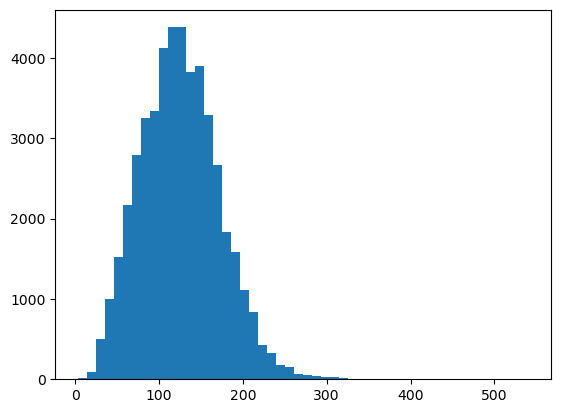

In [153]:
plt.hist([len(sen) for sen in sentences_list], bins= 50)
plt.show()

In [154]:
[len(sen) for sen in sentences_list]

[145,
 153,
 208,
 61,
 213,
 167,
 127,
 37,
 133,
 167,
 229,
 128,
 150,
 218,
 69,
 194,
 137,
 171,
 62,
 91,
 60,
 138,
 168,
 132,
 116,
 101,
 74,
 115,
 126,
 55,
 113,
 51,
 123,
 119,
 127,
 186,
 78,
 35,
 65,
 117,
 120,
 85,
 137,
 182,
 175,
 110,
 148,
 62,
 190,
 220,
 66,
 73,
 98,
 75,
 48,
 73,
 205,
 121,
 120,
 156,
 63,
 309,
 180,
 243,
 155,
 98,
 100,
 138,
 132,
 122,
 130,
 149,
 167,
 169,
 165,
 140,
 163,
 178,
 159,
 182,
 155,
 184,
 56,
 147,
 154,
 99,
 165,
 135,
 84,
 62,
 109,
 81,
 90,
 115,
 86,
 173,
 94,
 129,
 43,
 85,
 101,
 164,
 105,
 155,
 125,
 184,
 187,
 96,
 214,
 123,
 165,
 109,
 111,
 85,
 47,
 126,
 152,
 149,
 160,
 235,
 76,
 54,
 132,
 164,
 77,
 146,
 130,
 112,
 126,
 115,
 162,
 130,
 199,
 122,
 57,
 172,
 134,
 168,
 171,
 89,
 133,
 76,
 186,
 96,
 174,
 41,
 100,
 158,
 116,
 74,
 169,
 156,
 199,
 107,
 131,
 134,
 78,
 114,
 260,
 123,
 95,
 75,
 234,
 105,
 258,
 164,
 59,
 97,
 268,
 188,
 208,
 176,
 99,
 94,
 121,
 

In [155]:
[len(s.split()) for s in sentences_list]

[24,
 25,
 32,
 11,
 35,
 32,
 22,
 7,
 24,
 27,
 40,
 25,
 25,
 35,
 12,
 32,
 27,
 29,
 12,
 16,
 11,
 25,
 30,
 26,
 20,
 19,
 14,
 20,
 23,
 10,
 20,
 10,
 22,
 22,
 23,
 35,
 14,
 8,
 13,
 17,
 21,
 17,
 25,
 35,
 35,
 20,
 30,
 10,
 34,
 39,
 12,
 16,
 19,
 14,
 9,
 12,
 37,
 18,
 18,
 25,
 12,
 52,
 34,
 41,
 25,
 19,
 18,
 24,
 27,
 22,
 22,
 25,
 29,
 30,
 28,
 21,
 28,
 29,
 25,
 29,
 23,
 28,
 10,
 24,
 29,
 19,
 29,
 23,
 17,
 12,
 19,
 17,
 16,
 24,
 16,
 29,
 18,
 25,
 8,
 16,
 19,
 28,
 20,
 20,
 21,
 29,
 34,
 17,
 34,
 18,
 27,
 16,
 21,
 13,
 10,
 22,
 28,
 25,
 29,
 41,
 15,
 13,
 21,
 29,
 13,
 25,
 20,
 19,
 21,
 21,
 24,
 20,
 40,
 22,
 9,
 29,
 28,
 27,
 27,
 16,
 23,
 14,
 29,
 14,
 34,
 10,
 18,
 26,
 20,
 11,
 31,
 27,
 37,
 19,
 23,
 22,
 17,
 17,
 43,
 25,
 17,
 15,
 38,
 18,
 44,
 25,
 11,
 16,
 48,
 34,
 34,
 33,
 21,
 16,
 23,
 34,
 10,
 19,
 31,
 15,
 26,
 7,
 14,
 20,
 38,
 15,
 40,
 24,
 11,
 34,
 30,
 24,
 23,
 4,
 13,
 7,
 10,
 34,
 39,
 54,
 27,
 49

In [156]:
max_sentence_length=max([len(s.split()) for s in sentences_list])
print(max_sentence_length)

104


From the histogram, we can see that 50 will be a good number for sequence length and 104 is the maximum sequence length. Instead of using 104 as the sequence length, let us choose the nearest power of two as the sequence length - in this case it is 128

We now have to pad the encoded sentences and encoded tags . For the Encoded Sentences we can use 0 as the padding token and for Tags, the token index of 'O' can be used.

In [159]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

max_len=128

padded_encoded_sentences=pad_sequences(maxlen=max_len,sequences=encoded_sentence,padding="post",value=0)
padded_encoded_tags=pad_sequences(maxlen=max_len,sequences=encoded_tags,padding="post",value=tags_map['O'])

print("Shape of Encoded Sentence: ",padded_encoded_sentences.shape)
print("Shape of Encoded Labels: ",padded_encoded_tags.shape)
print()
print("First Encoded Sentence Without Padding:\n",encoded_sentence[0])
print("First Encoded Sentence with padding:\n",padded_encoded_sentences[0])
print()
print("First Sentence Encoded Label without Padding:\n",encoded_tags[0])
print("First Sentence Encoded Label with Padding:\n",padded_encoded_tags[0])

Shape of Encoded Sentence:  (47959, 128)
Shape of Encoded Labels:  (47959, 128)

First Encoded Sentence Without Padding:
 [1114, 4, 1161, 16, 1852, 229, 478, 6, 533, 1, 155, 5, 58, 8, 582, 1, 843, 4, 179, 87, 21, 15, 52, 2]
First Encoded Sentence with padding:
 [1114    4 1161   16 1852  229  478    6  533    1  155    5   58    8
  582    1  843    4  179   87   21   15   52    2    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]

First Sentence Encoded Label without Padding:
 [1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 8,

In [160]:
target= [to_categorical(i,num_classes = num_tags) for i in  padded_encoded_tags]
print("Shape of Labels  after converting to Categorical for first sentence: ",target[0].shape)

Shape of Labels  after converting to Categorical for first sentence:  (128, 17)


In [163]:
target

[array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],


In [165]:
#for i in  padded_encoded_tags:
#    print(i)

# Splitting the data into train, test and 

*   List item

> Indented block


*   List item

validation sets

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_val_test,y_train,y_val_test = train_test_split(padded_encoded_sentences,target,test_size = 0.3,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_val_test,y_val_test,test_size = 0.2,random_state=42)
print("Input Train Data Shape: ",X_train.shape)
print("Train Labels Length: ",len(y_train))
print("Input Test Data Shape: ",X_test.shape)
print("Test Labels Length: ",len(y_test))

print("Input Validation Data Shape: ",X_val.shape)
print("Validation Labels Length: ",len(y_val))

Input Train Data Shape:  (33571, 128)
Train Labels Length:  33571
Input Test Data Shape:  (2878, 128)
Test Labels Length:  2878
Input Validation Data Shape:  (11510, 128)
Validation Labels Length:  11510


In [167]:
print("First Sentence in Training Data: ",X_train[0])
print("First sentence Label: ",y_train[0])
print("Shape of First Sentence -Train: ",X_train[0].shape)
print("Shape of First Sentence Label  -Train: ",y_train[0].shape)

First Sentence in Training Data:  [5438   10 2546   48  782  166   26 3902    1   34   10 4674 1270   14
  800  340    2    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
First sentence Label:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
Shape of First Sentence -Train:  (128,)
Shape of First Sentence Label  -Train:  (128, 17)


# Building NER model using BiLSTMs

In [168]:
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import LSTM,Embedding,Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D,Bidirectional

In [170]:
embedding_dim=128
vocab_size=len(tokenizer.word_index)+1
lstm_units=128
max_len=128

input_word = Input(shape = (max_len,))
model = Embedding(input_dim = vocab_size+1,output_dim = embedding_dim,input_length = max_len)(input_word)

model = Bidirectional(LSTM(units=embedding_dim,return_sequences=True))(model)
out = TimeDistributed(Dense(num_tags,activation = 'softmax'))(model)
model = Model(input_word,out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding (Embedding)       (None, 128, 128)          4503040   
                                                                 
 bidirectional (Bidirection  (None, 128, 256)          263168    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 128, 17)           4369      
 ributed)                                                        
                                                                 
Total params: 4770577 (18.20 MB)
Trainable params: 4770577 (18.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [171]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

# Model Training

In [172]:
history = model.fit(X_train,np.array(y_train),validation_data=(X_val,np.array(y_val)),batch_size = 32,epochs = 3)

Epoch 1/3
1050/1050 [==============================] - 180s 169ms/step - loss: 0.0771 - accuracy: 0.9839 - val_loss: 0.0243 - val_accuracy: 0.9930
Epoch 2/3
1050/1050 [==============================] - 166s 158ms/step - loss: 0.0186 - accuracy: 0.9944 - val_loss: 0.0195 - val_accuracy: 0.9941
Epoch 3/3
1050/1050 [==============================] - 166s 158ms/step - loss: 0.0132 - accuracy: 0.9959 - val_loss: 0.0190 - val_accuracy: 0.9943


# Evaluation
To evaluate the model, we will have to remove the padded portion and identify the accuracy. For this, for every test data, let us create a dataframe wuth the tokens and the actual and predicted value - and use it to calculate the metrics

In [173]:
preds=model.predict(X_test) ## Predict using model on Test Data

90/90 [==============================] - 3s 34ms/step


In [178]:
def evaluatePredictions(test_data,preds,actual_preds):
    print("Shape of Test Data Array",test_data.shape)
    y_actual=np.argmax(np.array(actual_preds),axis=2)
    y_pred=np.argmax(preds,axis=2)
    num_test_data=test_data.shape[0]
    print("Number of Test Data Points ",num_test_data)
    data=pd.DataFrame()
    df_list=[]
    for i in range(num_test_data):
        test_str=list(test_data[i])
        df=pd.DataFrame()
        df['test_tokens']=test_str
        df['tokens']=df['test_tokens'].apply(lambda x:tokenizer.index_word[x] if x!=0 else '<PAD>')
        df['actual_target_index']=list(y_actual[i])
        df['pred_target_index']=list(y_pred[i])
        df['actual_target_tag']=df['actual_target_index'].apply(lambda x:reverse_tag_map[x])
        df['pred_target_tag']=df['pred_target_index'].apply(lambda x:reverse_tag_map[x])
        df['id']=i+1
        df_list.append(df)
    data=pd.concat(df_list)
    pred_data=data[data['tokens']!='<PAD>']
    accuracy=pred_data[pred_data['actual_target_tag']==pred_data['pred_target_tag']].shape[0]/pred_data.shape[0]


    return pred_data,accuracy

In [179]:
pred_data,accuracy=evaluatePredictions(X_test,preds,y_test)

Shape of Test Data Array (2878, 128)
Number of Test Data Points  2878


Let us calculate the precision and recall of each Class - and also the F1-Score.

In [180]:
y_pred=pred_data['pred_target_tag'].tolist()
y_actual=pred_data['actual_target_tag'].tolist()

In [181]:
from sklearn.metrics import classification_report

In [182]:
print(classification_report(y_actual,y_pred, labels=["B-art","B-eve","B-geo","B-gpe","B-nat","B-org","B-per","B-tim","I-art","I-eve","I-geo","I-gpe","I-nat","I-org","I-per","I-tim"]))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        27
       B-eve       0.75      0.18      0.29        17
       B-geo       0.84      0.89      0.86      2151
       B-gpe       0.97      0.92      0.94       919
       B-nat       0.00      0.00      0.00         5
       B-org       0.80      0.68      0.74      1305
       B-per       0.85      0.77      0.81      1062
       B-tim       0.93      0.86      0.89      1197
       I-art       0.00      0.00      0.00        30
       I-eve       0.00      0.00      0.00        15
       I-geo       0.70      0.82      0.76       413
       I-gpe       1.00      0.36      0.53        11
       I-nat       0.00      0.00      0.00         0
       I-org       0.84      0.72      0.78      1053
       I-per       0.86      0.85      0.85      1066
       I-tim       0.83      0.69      0.75       401

   micro avg       0.85      0.80      0.83      9672
   macro avg       0.59   

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [183]:
pred_data.head(30)

,test_tokens,tokens,actual_target_index,pred_target_index,actual_target_tag,pred_target_tag,id
0,4759,From,12,1,B-tim,O,1
1,521,2004,2,12,I-tim,B-tim,1
2,6,to,2,2,I-tim,I-tim,1
3,711,2007,2,2,I-tim,I-tim,1
4,3,",",1,1,O,O,1
5,1,the,1,1,O,O,1
6,201,economy,1,1,O,O,1
7,2249,grew,1,1,O,O,1
8,67,about,1,1,O,O,1
9,287,10,1,1,O,O,1


In [184]:
pred_data[pred_data['actual_target_tag']=="B-art"]

,test_tokens,tokens,actual_target_index,pred_target_index,actual_target_tag,pred_target_tag,id
7,996,60,16,1,B-art,O,23
8,20654,Endless,16,1,B-art,O,243
6,34027,Su-24,16,1,B-art,O,256
6,9820,Imperial,16,4,B-art,B-org,356
7,22803,Pentastar,16,1,B-art,O,380
11,7465,Chrysler,16,4,B-art,B-org,380
13,22805,Dodge,16,1,B-art,O,380
15,22806,Jeep,16,1,B-art,O,380
17,16772,Ram,16,5,B-art,B-per,380
15,831,Central,16,4,B-art,B-org,452


In [185]:
pred_data[pred_data['actual_target_tag']=="B-geo"][0:5]

,test_tokens,tokens,actual_target_index,pred_target_index,actual_target_tag,pred_target_tag,id
5,281,African,8,8,B-geo,B-geo,2
9,152,South,8,8,B-geo,B-geo,2
12,6092,Thabo,8,4,B-geo,B-org,2
0,108,China,8,8,B-geo,B-geo,3
10,660,Republic,8,13,B-geo,I-geo,6


# Improve the model

Using pre-trained word Embeddings can also help improve the model.

Using BERT like models for Fine-Tuning.

We can also make changes to the model hyperparameters like epochs, number of LSTM Units, Activation Function used etc